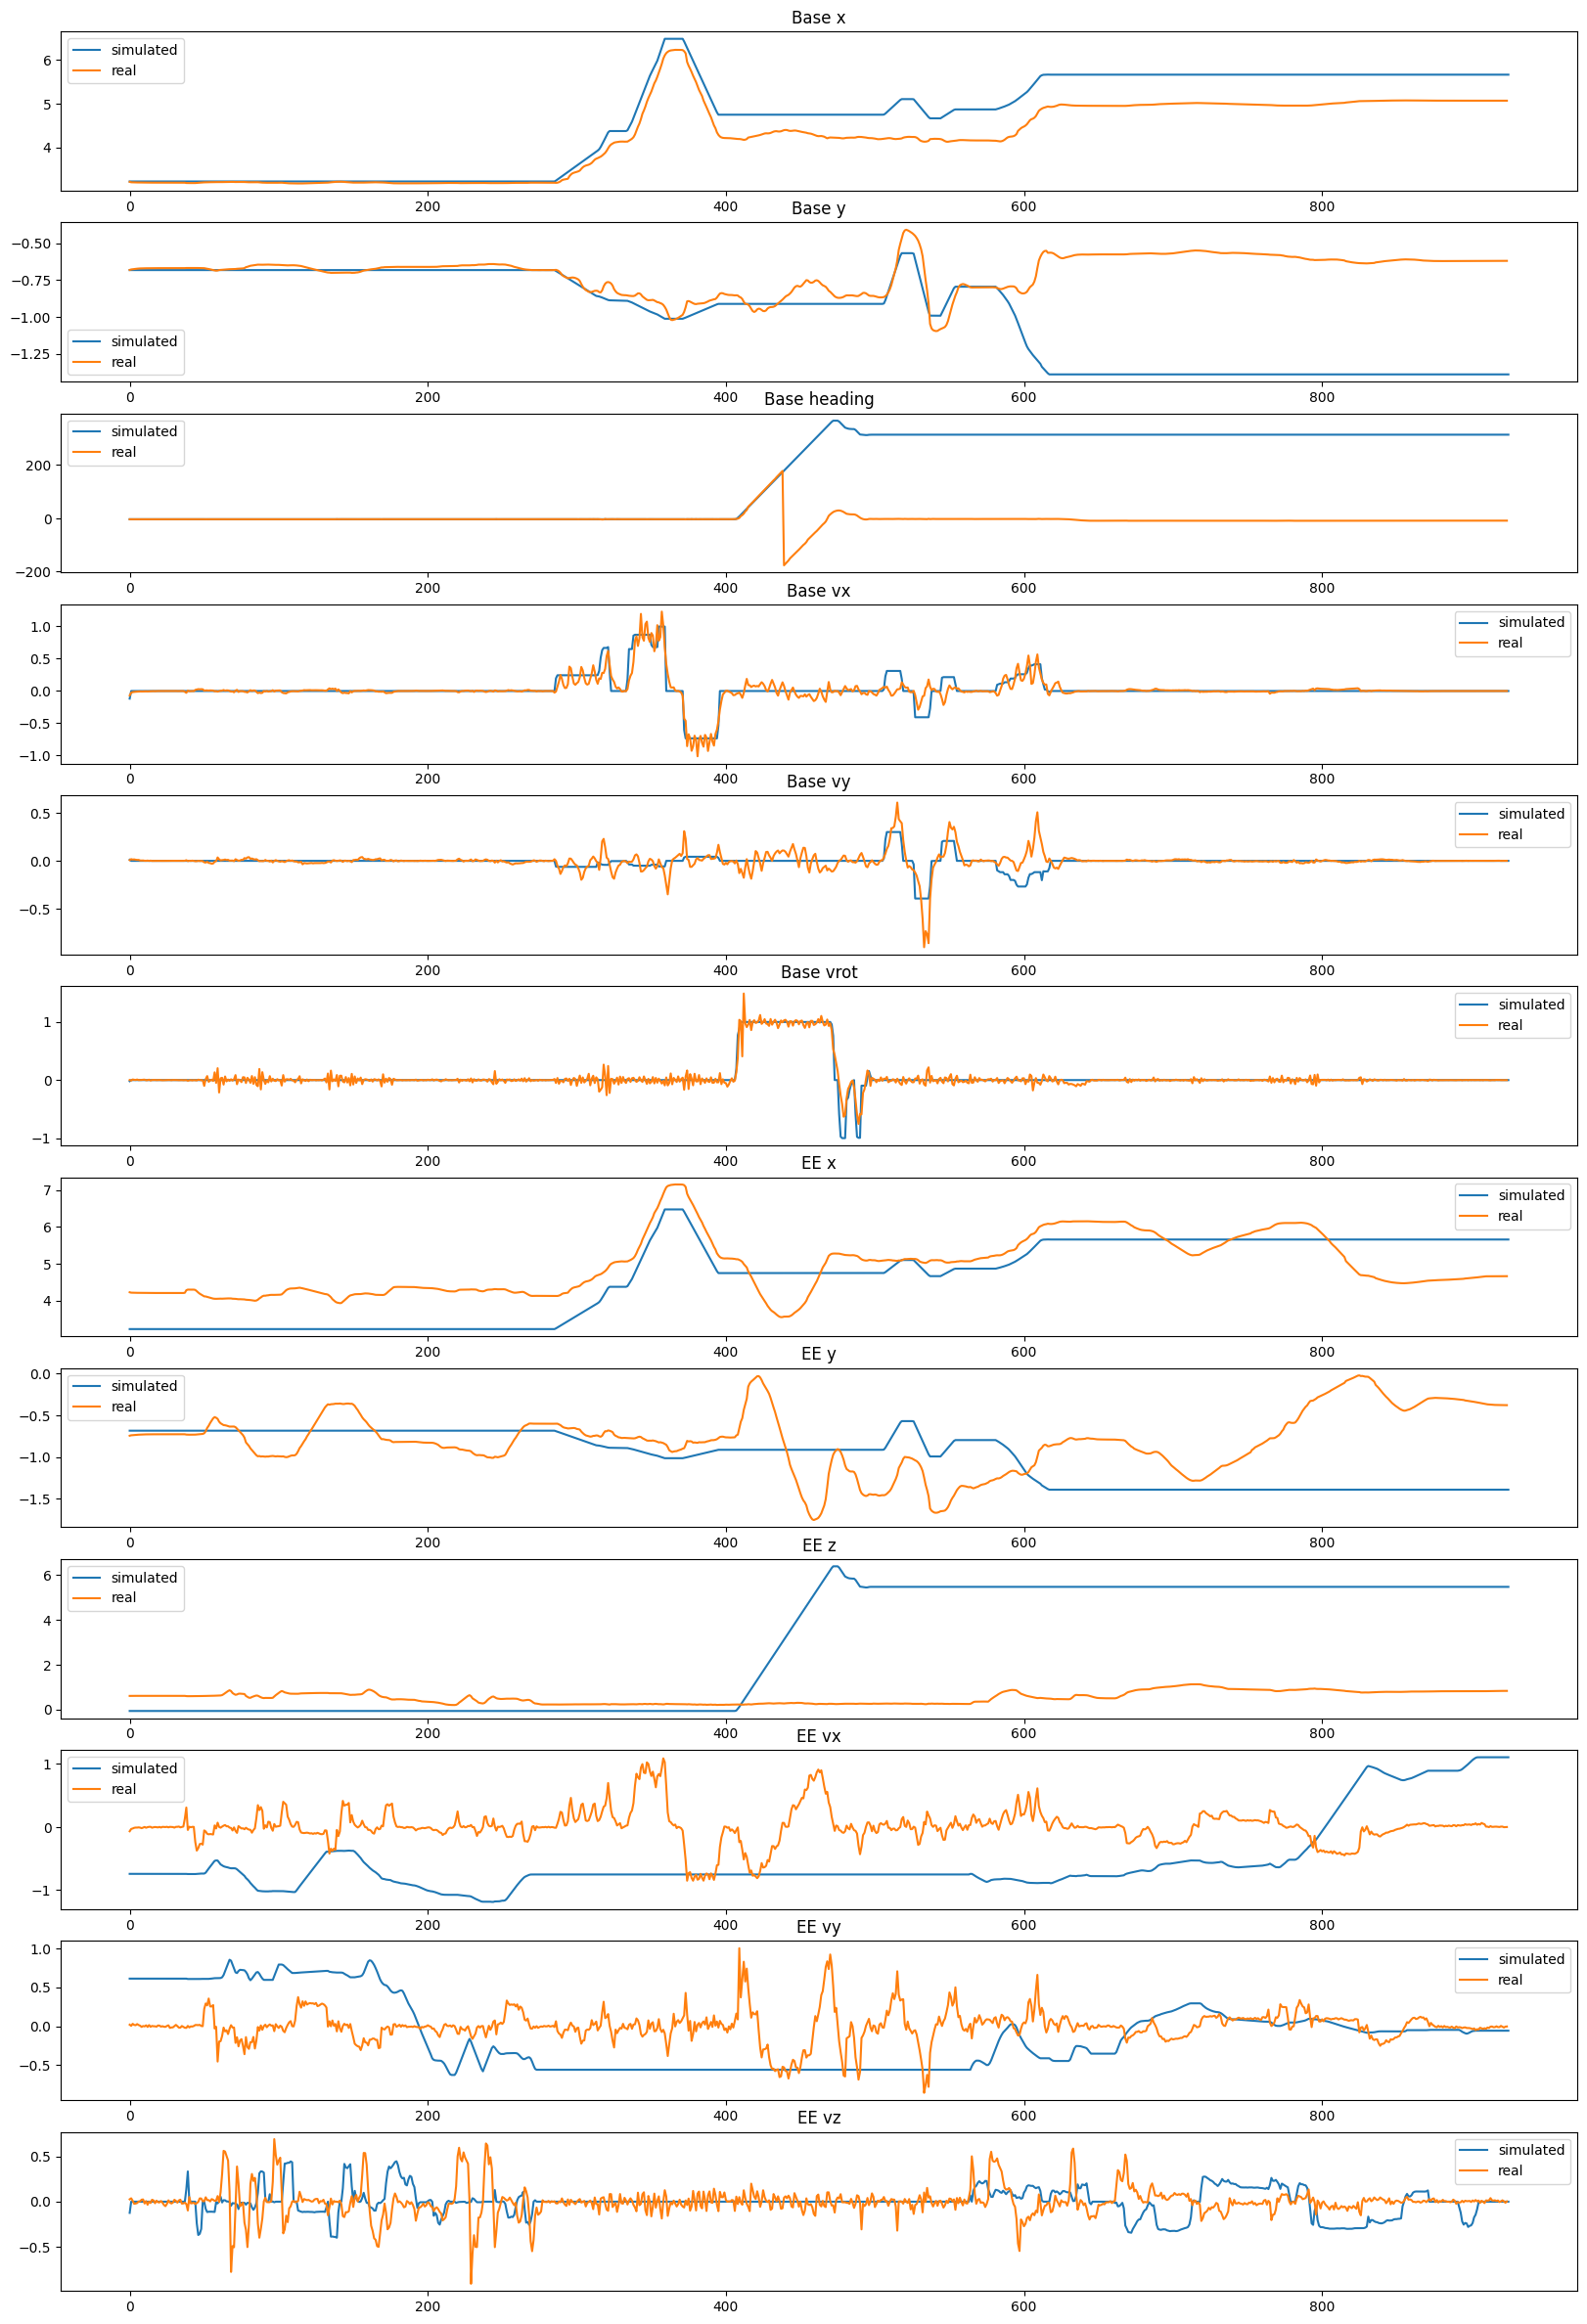

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

from alrd.run_spot import SessionBuffer, DataBuffer, TransitionData, StateData, TimeData
from alrd.spot_gym.model.robot_state import SpotState

# load real data
real_data_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/collected_data/test20240806-135621/session_buffer.pickle"
with open(real_data_path, "rb") as file:
    real_data = pickle.load(file)

states = real_data.data_buffers[0].states

# skip first step
states = states[1:]

real_body_positions = np.array([s.next_state.pose_of_body_in_vision[0:3] for s in states])
real_body_orientations = np.array([s.next_state.pose_of_body_in_vision[3:] for s in states])
real_body_headings = R.from_quat(real_body_orientations).as_euler('xyz', degrees=True)[:,2]
real_body_velocities = np.array([s.next_state.velocity_of_body_in_vision for s in states])

real_ee_positions = np.array([s.next_state.pose_of_hand_in_vision[0:3] for s in states])
real_ee_orentations = np.array([s.next_state.pose_of_hand_in_vision[3:] for s in states])
# real_ee_orentations = R.from_quat(real_ee_orentations_pre).as_euler('xyz', degrees=True)
real_ee_velocities = np.array([s.next_state.velocity_of_hand_in_vision for s in states])


# load simlauted trajectory data
file_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/alrd/spot_simulator/generated_trajectories/trajectory_20240806-164303.pickle"
with open(file_path, "rb") as file:
    data = pickle.load(file)
    

base_x = [d[0] for d in data]
base_y = [d[1] for d in data]
heading = [d[2] for d in data]
base_vx = [d[3] for d in data]
base_vy = [d[4] for d in data]
base_vrot = [d[5] for d in data]

ee_x = [d[0] for d in data]
ee_y = [d[1] for d in data]
ee_z = [d[2] for d in data]
ee_qx = [d[3] for d in data]
ee_qy = [d[4] for d in data]
ee_qz = [d[5] for d in data]
ee_qw = [d[6] for d in data]
ee_vx = [d[7] for d in data]
ee_vy = [d[8] for d in data]
ee_vz = [d[9] for d in data]

# plot and label
fig, axs = plt.subplots(12, 1, figsize=(20, 30))
axs[0].plot(base_x, label="simulated")
axs[0].plot(real_body_positions[:,0], label="real")
axs[1].plot(base_y, label="simulated")
axs[1].plot(real_body_positions[:,1], label="real")
axs[2].plot(np.rad2deg(heading), label="simulated")
axs[2].plot(real_body_headings, label="real")
axs[3].plot(base_vx, label="simulated")
axs[3].plot(real_body_velocities[:,0], label="real")
axs[4].plot(base_vy, label="simulated")
axs[4].plot(real_body_velocities[:,1], label="real")
axs[5].plot(base_vrot, label="simulated")
axs[5].plot(real_body_velocities[:,5], label="real")

axs[6].plot(ee_x, label="simulated")
axs[6].plot(real_ee_positions[:,0], label="real")
axs[7].plot(ee_y, label="simulated")
axs[7].plot(real_ee_positions[:,1], label="real")
axs[8].plot(ee_z, label="simulated")
axs[8].plot(real_ee_positions[:,2], label="real")
axs[9].plot(ee_vx, label="simulated")
axs[9].plot(real_ee_velocities[:,0], label="real")
axs[10].plot(ee_vy, label="simulated")
axs[10].plot(real_ee_velocities[:,1], label="real")
axs[11].plot(ee_vz, label="simulated")
axs[11].plot(real_ee_velocities[:,2], label="real")

for ax in axs:
    ax.legend()

# add labels
axs[0].set_title("Base x")
axs[1].set_title("Base y")
axs[2].set_title("Base heading")
axs[3].set_title("Base vx")
axs[4].set_title("Base vy")
axs[5].set_title("Base vrot")
axs[6].set_title("EE x")
axs[7].set_title("EE y")
axs[8].set_title("EE z")
axs[9].set_title("EE vx")
axs[10].set_title("EE vy")
axs[11].set_title("EE vz")


plt.show()
